In [ ]:
!nvidia-smi

Sat Jul 25 02:56:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#5.1 일단 사용해보기 

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

np.random.seed(777)

class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

x_train = np.reshape(x_train/255, (-1,28,28,1))
x_test = np.reshape(x_test/255, (-1,28,28,1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

print("Fashion-MNIST ready~")

4423680/4422102 [==============================] - 0s 0us/step
Fashion-MNIST ready~


In [ ]:
model = Sequential([
                    Conv2D(filters=16, kernel_size=3, padding='same',activation='relu', input_shape=(28,28,1)),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 4s 12ms/step - loss: 0.6742 - acc: 0.7559 - val_loss: 0.4641 - val_acc: 0.8320
Epoch 2/30
329/329 [==============================] - 3s 11ms/step - loss: 0.3958 - acc: 0.8580 - val_loss: 0.3475 - val_acc: 0.8784
Epoch 3/30
329/329 [==============================] - 4s 11ms/step - loss: 0.3450 - acc: 0.8749 - val_loss: 0.3300 - val_acc: 0.8815
Epoch 4/30
329/329 [==============================] - 3s 11ms/step - loss: 0.3078 - acc: 0.8894 - val_loss: 0.3002 - val_acc: 0.8924
Epoch 5/30
329/329 [==============================] - 3s 11ms/step - loss: 0.2926 - acc: 0.8940 - val_loss: 0.2954 - val_acc: 0.8922
Epoch 6/30
329/329 [==============================] - 3s 10ms/step - loss: 0.2683 - acc: 0.9022 - val_loss: 0.2773 - val_acc: 0.9000
Epoch 7/30
329/329 [==============================] - 3s 10ms/step - loss: 0.2543 - acc: 0.9075 - val_loss: 0.2737 - val_acc: 0.9028
Epoch 8/30
329/329 [==============================] - 3s 10ms/step - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3888 - acc: 0.9007

테스트 정확도: 0.9006999731063843


# 5.2 컨볼루션층과 풀링층

4423680/4422102 [==============================] - 0s 0us/step


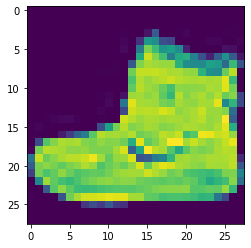

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

plt.imshow(x_train[0])

In [ ]:
import cv2

horizontal_filter = np.array([[1,2,1],
                              [0,0,0],
                              [-1,-2,-1]])
vertical_filter = np.array([[1,0,-1],
                            [2,0,-2],
                            [1,0,-1]])

test_image = cv2.resize(x_train[0], (27,27))
image_size = test_image.shape[0]
output_size = int((image_size -3)/1 +1)
print('output의 크기 : %d' % output_size)

output의 크기 : 25


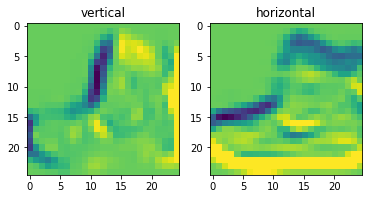

In [ ]:
filter_size = 3

def get_filtered_image(filter):
  filtered_image = np.zeros((output_size, output_size))
  for i in range(output_size):
    for j in range(output_size):
      indice_image = test_image[i:(i+filter_size), j:(j+filter_size)] * filter
      indice_sum = np.sum(indice_image)
      if(indice_sum>255):
        indice_sum = 255
      filtered_image[i,j] = indice_sum
  return filtered_image

vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

plt.subplot(1,2,1)
plt.title('vertical')
plt.imshow(vertical_filtered_image)

plt.subplot(1,2,2)
plt.title("horizontal")
plt.imshow(horizontal_filtered_image)
plt.show()

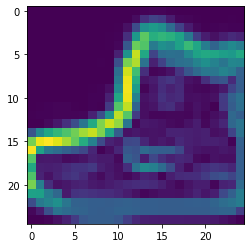

In [ ]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image))

plt.imshow(sobel_image)

# 컨볼루션

#### 스트라이드
- 1X1 스트라이드보다 큰 스트라이드를 사용하면 특징맵을 다운샘플링(신경망의 파라미터 수를 감소시키는 효과)하는 효과를 볼 수 있다.
- 입력데이터보다 특징맵의 크기가 감소한 형태로 출력된다.

#### 패딩
- 특징맵의 크기가 감소하지 않고, 출력값이 입력데이터의 형태와 동일하다.
- 이미지 가장자리 부분에 해당하는 정보를 손실하지 않고 전달해줄 수 있는 효과   

출력 특성 맵의 크기 = (N-F) + 2*P/stride + 1 (N=입력데이터크기, F=필터크기, P=패딩크기)

#### 풀링
- 특징맵의 크기를 줄이는 역할 (다운샘플링)
- 평균풀링, **최대풀링**
- 모델이 물체의 주요한 특징을 학습할 수 있도록 도와주며, 컨볼루션 신경망이 이동불변성 특성을 가지도록 한다.
- 모델 파라미터 수를 줄여준다.

컨볼루션 신경망에서 최대 풀링층을 사용하고 있다면 컨볼루션 층에서 1X1스트라이드를 사용하는 것이 좋음.


iriginal image shape: (28,28)
pooled image shape: (14,14)


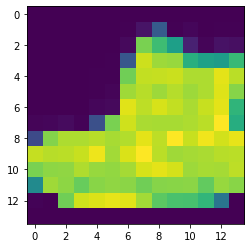

In [ ]:
# 풀링연산 구현

image = x_train[0]
image_x = image.shape[0]
image_y = image.shape[1]
new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)

pooled_image = np.zeros((new_image_x, new_image_y))
print(f'iriginal image shape: ({image_x},{image_y})')
print(f'pooled image shape: ({new_image_x},{new_image_y})')

for x in range(0, image_x, 2):
  for y in range(0, image_y,2):
    pooled_image[int(x/2), int(y/2)] = np.max(image[x:x+2, y:y+2])

plt.imshow(pooled_image)

Conv2D(filters, kernel_size, strides, padding, activation)
- filters : 특징맵의 차원 (특징맵의 형태 : (batch_size, rows, cols, filters))
- kernel_size : 필터 크기. (3.3)이렇게 튜플 형태로 지정해도 되고 숫자 하나만 넣어도 됨
- strides : 스트라이드 크기. (3.3)이렇게 튜플 형태로 지정해도 되고 숫자 하나만 넣어도 됨
- padding : 패딩에 대한 결정여부. same = 입출력의 형태 같음. valid = 사용안함
- activation : 사용할 활성화 함수. 문자열 또는 클래스 형태로 제공

MaxPool2D(pool_size, strides, padding)
- pool_size : 풀링층에서 사용할 커널의 크기
- strides : 스트라이드 크기 지정. 기본값은 None이지만 값이 주어지지 않는 경우에는 pool_size와 동일한 크기로 지정됨.

In [ ]:
model = Sequential([
                    Conv2D(filters=16, kernel_size=3, padding='same',activation='relu', input_shape=(28,28,1)),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
# 모델 구조 확인

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

## 5.3 CIFAR-10

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


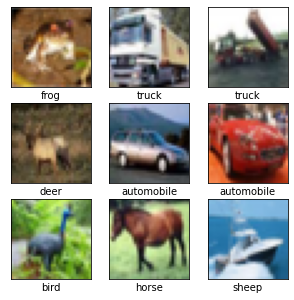

In [ ]:
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse','sheep','truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [ ]:
# 전처리 : 채널별로 평균과 표준편차를 구해서 표준화함

x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 16s 14ms/step - loss: 1.6146 - acc: 0.4185 - val_loss: 1.3649 - val_acc: 0.5087
Epoch 2/30
1094/1094 [==============================] - 15s 14ms/step - loss: 1.2598 - acc: 0.5510 - val_loss: 1.1718 - val_acc: 0.5841
Epoch 3/30
1094/1094 [==============================] - 15s 14ms/step - loss: 1.0973 - acc: 0.6121 - val_loss: 1.0868 - val_acc: 0.6139
Epoch 4/30
1094/1094 [==============================] - 15s 14ms/step - loss: 0.9705 - acc: 0.6613 - val_loss: 0.9753 - val_acc: 0.6581
Epoch 5/30
1094/1094 [==============================] - 15s 14ms/step - loss: 0.8660 - acc: 0.7007 - val_loss: 0.9262 - val_acc: 0.6757
Epoch 6/30
1094/1094 [==============================] - 15s 14ms/step - loss: 0.7784 - acc: 0.7315 - val_loss: 0.8918 - val_acc: 0.6881
Epoch 7/30
1094/1094 [==============================] - 15s 14ms/step - loss: 0.7021 - acc: 0.7559 - val_loss: 0.8813 - val_acc: 0.6935
Epoch 8/30
1094/1094 [==========================

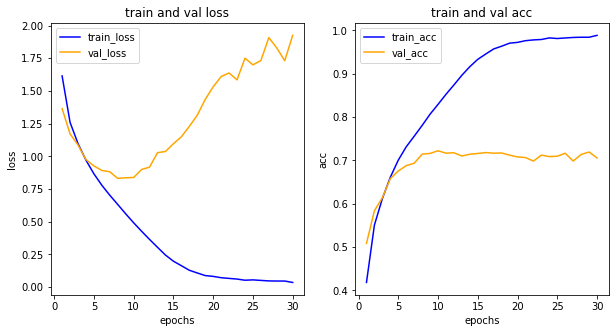

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


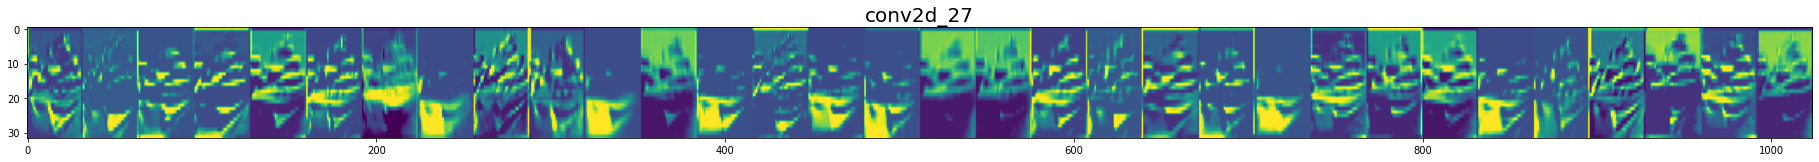

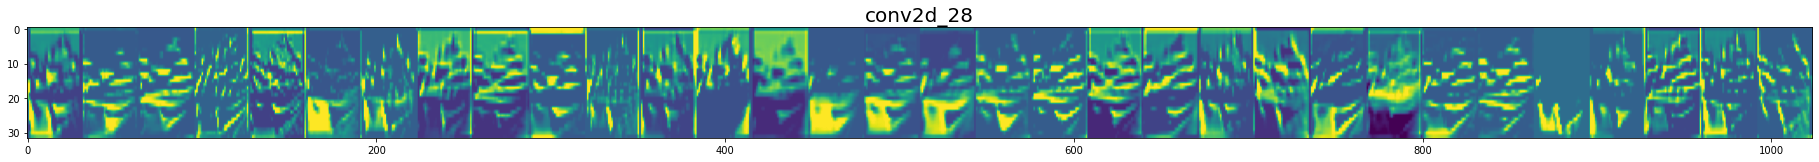

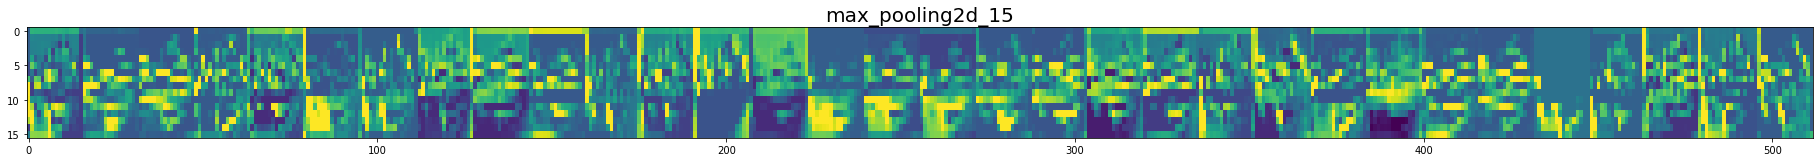

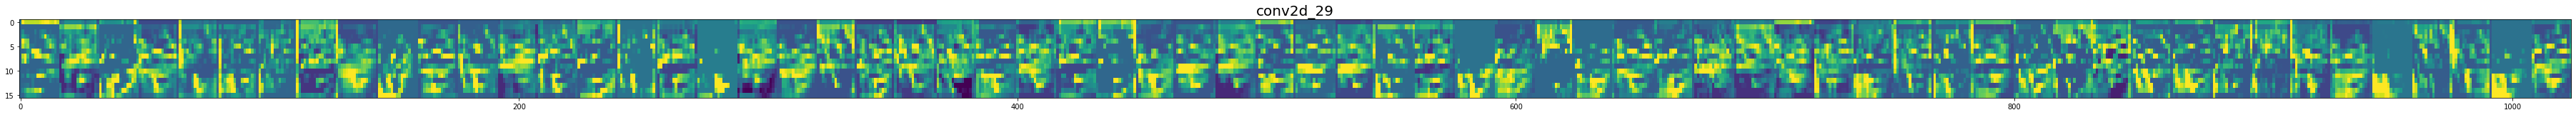

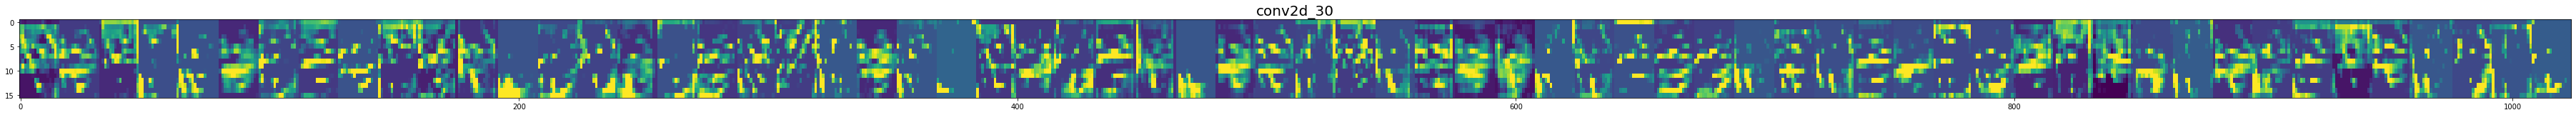

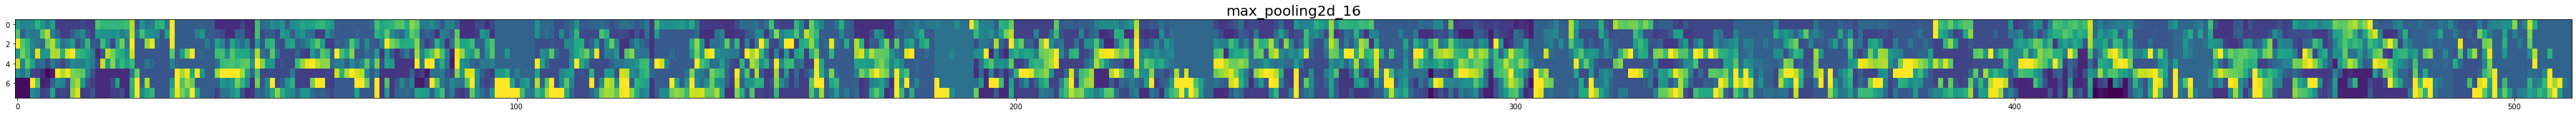

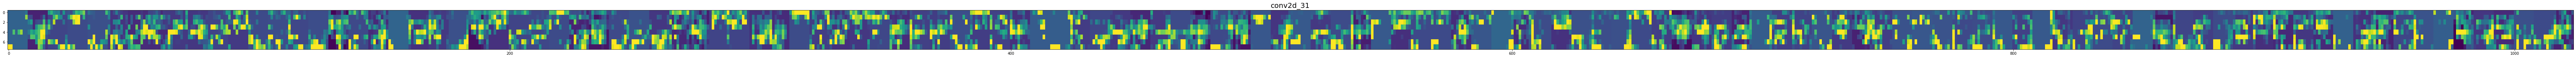

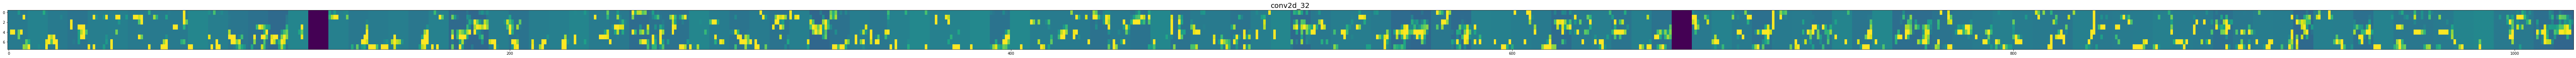

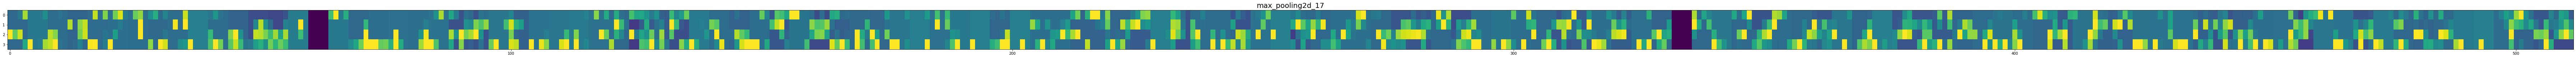

In [ ]:
# 신경망 시각화

import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

# 테스트셋의 두 번째 데이터는 '배'입니다.
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    # Dense 층은 제외합니다.
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        display_grid = np.zeros((img_size, img_size * features))
        
        # 각 특징맵을 display_grid 배열에 이어붙입니다.
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
            
        plt.figure(figsize = (features, 2 + 1./features))
        plt.title(layer_name, fontsize = 20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

## 과대적합 문제 해결하기
#### 1. 규제화함수 (L1, L2, 엘라스틱넷)

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 7s 6ms/step - loss: 2.0894 - acc: 0.4103 - val_loss: 1.7749 - val_acc: 0.5114
Epoch 2/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.6559 - acc: 0.5468 - val_loss: 1.6051 - val_acc: 0.5676
Epoch 3/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.4462 - acc: 0.6180 - val_loss: 1.3861 - val_acc: 0.6355
Epoch 4/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.3046 - acc: 0.6625 - val_loss: 1.3012 - val_acc: 0.6559
Epoch 5/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.1922 - acc: 0.6971 - val_loss: 1.2729 - val_acc: 0.6617
Epoch 6/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.1086 - acc: 0.7210 - val_loss: 1.2109 - val_acc: 0.6828
Epoch 7/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0263 - acc: 0.7491 - val_loss: 1.1341 - val_acc: 0.7111
Epoch 8/30
1094/1094 [==============================] - 7s 6ms

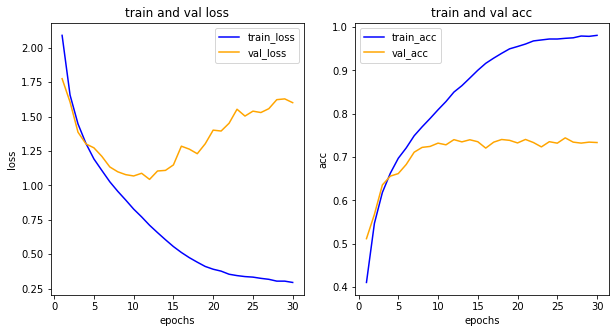

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

## 과대적합 문제 해결하기
#### 2. 드롭아웃
- 학습이 진행되는 동안 신경망의 일부 유닛을 제외
- 비율은 일반적으로 0.2~0.5 사용
- 테스트 시에는 드롭아웃이 작동하지 않고 모든 유닛이 활성화되어 출력되는데 출력값을 드롭아웃 비율만큼 줄여줌
- 단점 : 학습속도를 느리게 함

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))  #드롭아웃 추가
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))  #드롭아웃 추가
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))  #드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.7413 - acc: 0.3647 - val_loss: 1.4522 - val_acc: 0.4754
Epoch 2/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.3991 - acc: 0.4950 - val_loss: 1.2930 - val_acc: 0.5321
Epoch 3/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2466 - acc: 0.5544 - val_loss: 1.1467 - val_acc: 0.5873
Epoch 4/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.1271 - acc: 0.6003 - val_loss: 1.0466 - val_acc: 0.6303
Epoch 5/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0294 - acc: 0.6349 - val_loss: 0.9628 - val_acc: 0.6607
Epoch 6/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.9506 - acc: 0.6639 - val_loss: 0.9174 - val_acc: 0.6768
Epoch 7/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.8968 - acc: 0.6834 - val_loss: 0.9169 - val_acc: 0.6805
Epoch 8/30
1094/1094 [==============================] - 6s 6ms

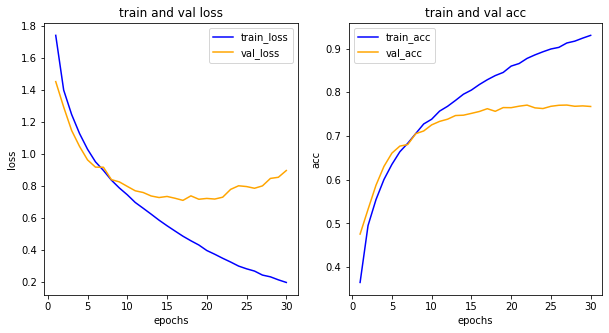

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

## 과대적합 문제 해결하기
#### 3. 배치 정규화
- 출력값 분포의 범위를 줄여주어 불확실성을 어느 정도 감소시키는 방법
- 장점1) 높은 학습률을 사용할 때 생기는 그래디언트 손실/폭발 문제를 방지할 수 있어 높은 학습률을 사용하여 빠른 속도로 학습을 진행할 수 있게 한다.
- 장점2) 자체적인 규제효과가 있어서 과대적합 문제를 피할 수 있게 한다.
- 모델구성 : Dense층 or Conv2D층 -> BatchNormalization -> Activation

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Activation

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.6388 - acc: 0.4119 - val_loss: 1.3633 - val_acc: 0.5079
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.1977 - acc: 0.5765 - val_loss: 1.2170 - val_acc: 0.5677
Epoch 3/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9739 - acc: 0.6607 - val_loss: 1.1297 - val_acc: 0.6045
Epoch 4/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.7954 - acc: 0.7291 - val_loss: 1.1063 - val_acc: 0.6176
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.6449 - acc: 0.7871 - val_loss: 1.0609 - val_acc: 0.6349
Epoch 6/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.5147 - acc: 0.8355 - val_loss: 1.1355 - val_acc: 0.6171
Epoch 7/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.4085 - acc: 0.8731 - val_loss: 1.1137 - val_acc: 0.6373
Epoch 8/30
1094/1094 [==============================] - 7s 7ms

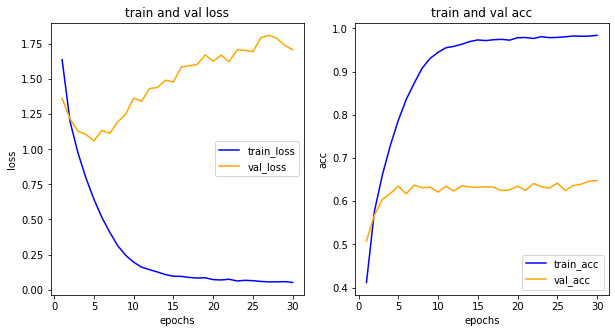

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.7634 - acc: 0.6390

테스트 정확도: 0.6389999985694885


## 전이 학습

In [ ]:
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(weights='imagenet', input_shape=(32,32,3), include_top = False)

model=Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 14,849,610
Trainable params: 14,849,098
N

In [ ]:
for layer in vgg16.layers[:-4]:
  layer.trainable = False

In [ ]:
model=Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics=['acc'])

def get_step(train_len, batch_size):
  if(train_len % batch_size>0):
    return train_len // batch_size+1
  else:
    return train_len // batch_size

history = model.fit(train_generator, epochs=100, steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val),batch_size))

NameError: ignored